In [ ]:
#Which Attributes Most Impact Sleep Quality?
### Project By Heena
### Date: 07/10/2024


## Background
In this project, I will delve into data collected by SleepInc's sleep-tracking app to uncover lifestyle, health, and demographic factors that are closely associated with poor sleep quality.

The project will involve the following steps:

Data review
Data exploration
Data summarization
Data visualization
Model creation
Conclusion and sharing of insights
Through this analysis, I aim to identify the key factors that most strongly correlate with poor sleep quality and provide recommendations for individuals seeking to improve their sleep.

In [ ]:
The Data
SleepInc has provided an anonymized dataset containing sleep and lifestyle metrics for 374 individuals. The dataset includes average values for each person calculated over the past six months and comprises 13 columns covering various aspects of sleep health.

Dataset Columns
Person ID: An identifier for each individual.
Gender: The gender of the person (Male/Female).
Age: The age of the person in years.
Occupation: The occupation or profession of the person.
Sleep Duration (hours): The average number of hours the person sleeps per day.
Quality of Sleep (scale: 1-10): A subjective rating of sleep quality, ranging from 1 to 10.
Physical Activity Level (minutes/day): The average number of minutes the person engages in physical activity daily.
Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
Blood Pressure (systolic/diastolic): The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
Heart Rate (bpm): The average resting heart rate of the person in beats per minute.
Daily Steps: The average number of steps the person takes per day.
Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
raw_data=pd.read_csv('sleep_health_data.csv')
                     

In [9]:
raw_data


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [10]:
raw_data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [11]:
raw_data['Gender'].value_counts()


Male      189
Female    185
Name: Gender, dtype: int64

In [12]:
raw_data['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [ ]:
The majority of survey participants are healthcare workers (nurses and doctors), which may introduce bias into the analysis due to the uneven representation of occupations.

In [ ]:
 Additionally, since there are only two 'Sales Representatives', I will combine them into the 'Salesperson' category

In [13]:
raw_data['Occupation'] = raw_data['Occupation'].replace({'Sales Representative': 'Salesperson'})
raw_data['Occupation'].value_counts()


Nurse                73
Doctor               71
Engineer             63
Lawyer               47
Teacher              40
Accountant           37
Salesperson          34
Software Engineer     4
Scientist             4
Manager               1
Name: Occupation, dtype: int64

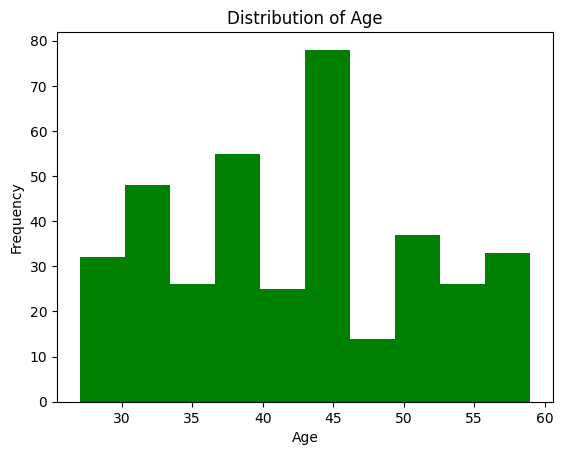

In [15]:
plt.hist(raw_data.Age, color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [ ]:

Most participants are in their mid-40s.


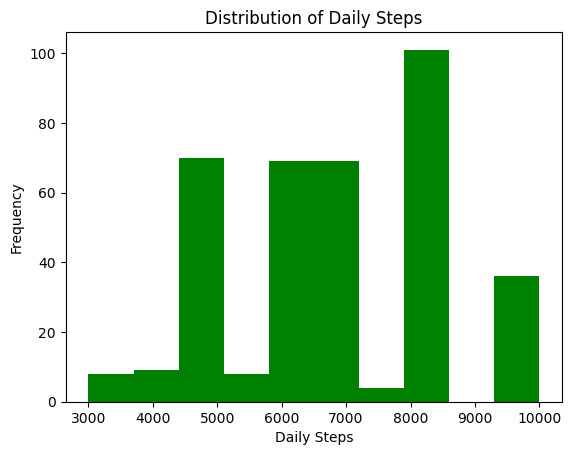

In [19]:
plt.hist(raw_data['Daily Steps'], color='green')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Steps')
plt.show()


In [20]:
raw_data['Sleep Disorder'].value_counts(sort=True)

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [ ]:
We can draw the following conclusions regarding the distribution of sleep disorders among the participants:

No Sleep Disorder: The majority of participants (219 out of 374) do not suffer from any sleep disorder. This indicates that around 58.6% of the surveyed individuals have not reported any sleep-related issues such as Sleep Apnea or Insomnia.

Sleep Apnea: There are 78 participants diagnosed with Sleep Apnea, accounting for approximately 20.9% of the total participants. This suggests that a significant portion of the surveyed population is affected by this specific sleep disorder.

Insomnia: A similar number of participants (77 out of 374) suffer from Insomnia, which is about 20.6% of the total. This highlights that Insomnia is also a prevalent sleep issue among the participants.

Overall, these findings indicate that about 41.4% of the participants experience some form of sleep disorder, with nearly equal prevalence of Sleep Apnea and Insomnia. This underscores the importance of addressing these sleep disorders within the surveyed population.

In [21]:
raw_data['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [ ]:
# Combine 'Normal' and 'Normal Weight' categories since they appear to mean the same thing

In [22]:
raw_data['BMI Category'] = raw_data['BMI Category'].replace({'Normal Weight': 'Normal'})
raw_data['BMI Category'].value_counts()

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64

In [ ]:
We can draw the following conclusions:

Normal Weight: The majority of participants (216 out of 374) fall into the "Normal" BMI category. This accounts for approximately 57.8% of the surveyed individuals, indicating that a significant portion of the population has a BMI within the normal range.

Overweight: There are 148 participants classified as "Overweight," making up about 39.6% of the total participants. This suggests that a notable proportion of the surveyed population is above the normal weight range.

Obese: A small number of participants (10 out of 374) are classified as "Obese," which represents around 2.7% of the total. This indicates that obesity is less prevalent compared to the other BMI categories among the surveyed individuals.

Overall, these findings provide insight into the distribution of BMI categories among the participants, highlighting a majority within the normal weight range but also significant numbers in the overweight category.



In [ ]:
# Summarise


In [27]:
### I am creating a data
data_num = raw_data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]

In [26]:
data_num.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [34]:
# View mean stats by gender
raw_data.groupby('Gender').mean(numeric_only="True").sort_values(by='Quality of Sleep')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Gender,,,,,,,,
Male,125.095238,37.074074,7.036508,6.968254,59.201058,6.079365,71.052910,6793.650794
Female,251.254054,47.405405,7.229730,7.664865,59.140541,4.675676,69.259459,6840.540541


In [35]:
# View mean stats by occupation
raw_data.groupby('Occupation').mean(numeric_only="True").sort_values(by='Quality of Sleep')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Occupation,,,,,,,,
Scientist,75.500000,33.500000,6.000000,5.000000,41.000000,7.000000,78.500000,5350.000000
Salesperson,205.794118,42.617647,6.373529,5.882353,44.117647,7.058824,72.764706,5823.529412
Software Engineer,46.250000,31.250000,6.750000,6.500000,48.000000,6.000000,75.500000,5800.000000
Doctor,64.056338,32.676056,6.970423,6.647887,55.352113,6.732394,71.521127,6808.450704
Teacher,196.075000,41.725000,6.690000,6.975000,45.625000,4.525000,67.225000,5957.500000
Manager,264.000000,45.000000,6.900000,7.000000,55.000000,5.000000,75.000000,5500.000000
Nurse,295.849315,51.794521,7.063014,7.369863,78.589041,5.547945,72.000000,8057.534247
Accountant,153.054054,39.621622,7.113514,7.891892,58.108108,4.594595,68.864865,6881.081081
Lawyer,153.893617,39.425532,7.410638,7.893617,70.425532,5.063830,69.638298,7661.702128


In [ ]:
Scientists have a lower average sleep duration (6 hours) and quality of sleep (5).
They have a moderate level of physical activity (41 minutes/day) but a high stress level (7).
Their average daily steps are relatively low (5350 steps).
Engineers have the highest sleep duration (7.99 hours) and quality of sleep (8.41).
They have a moderate physical activity level (51.86 minutes/day) and the lowest stress level (3.89).
Their daily steps are also moderate (5980.95 steps).
Insights:
Occupation Influence: Occupation seems to have a significant impact on sleep quality and duration. Engineers, Lawyers, and Accountants report the highest sleep quality and duration, possibly due to lower stress levels.
Physical Activity and Sleep: Higher levels of physical activity generally correlate with better sleep quality. For instance, Nurses and Doctors, who have higher physical activity levels, report good sleep quality.
Stress Levels: Occupations with lower stress levels, such as Engineers and Teachers, tend to have higher sleep quality. This suggests that managing stress might be key to improving sleep quality.
Daily Steps: Occupations that require more physical movement, like Nurses and Lawyers, tend to have higher daily steps, which also correlate with better sleep quality.


In [36]:
#correlation matrix for the numerical variables
data_num.corr()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


In [ ]:
Based on the correlation matrix, 'Quality of Sleep' shows the highest correlation with 'Sleep Duration' and 'Stress Level'. It also appears to have a moderate correlation with 'Heart Rate'. Additionally, 'Sleep Duration' and 'Stress Level' are highly correlated, while 'Stress Level' has a moderate correlation with 'Heart Rate

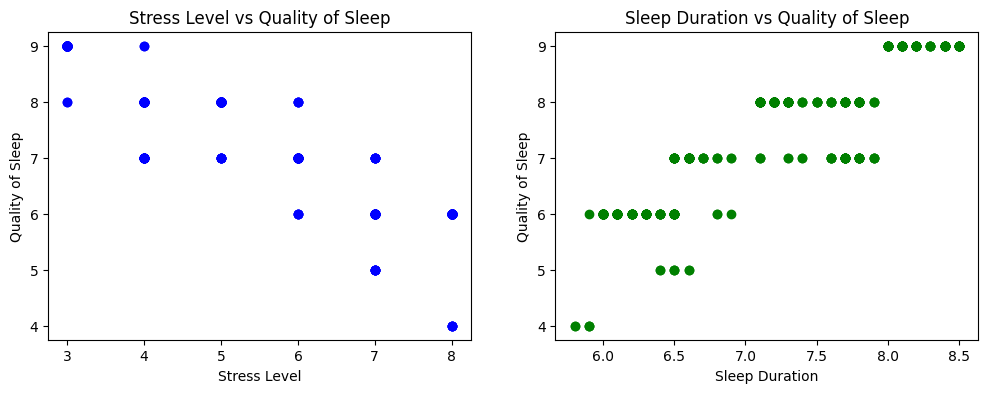

In [37]:
# Visualizing the relationship between the most correlated variables to quality of sleep
#subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot for Quality of Sleep vs Stress Level
ax1.scatter(raw_data['Stress Level'], raw_data['Quality of Sleep'], color='blue')
ax1.set_title('Stress Level vs Quality of Sleep')
ax1.set_xlabel('Stress Level')
ax1.set_ylabel('Quality of Sleep')

# Scatter plot for Quality of Sleep vs Sleep Duration
ax2.scatter(raw_data['Sleep Duration'], raw_data['Quality of Sleep'], color='green')
ax2.set_title('Sleep Duration vs Quality of Sleep')
ax2.set_xlabel('Sleep Duration')
ax2.set_ylabel('Quality of Sleep')

# Show plot
plt.show()


In [ ]:
From the visualizations, we can summarize the following insights:

Stress Level vs Quality of Sleep:

There is a noticeable negative relationship between stress level and quality of sleep. As the stress level increases, the quality of sleep tends to decrease.
This suggests that higher stress levels may adversely impact the quality of sleep.
Sleep Duration vs Quality of Sleep:

There is a positive relationship between sleep duration and quality of sleep. As the duration of sleep increases, the quality of sleep tends to improve.
This indicates that longer sleep duration is associated with better quality of sleep.
Overall, these visualizations highlight the significant impact that stress level and sleep duration have on the quality of sleep. Reducing stress levels and ensuring longer sleep duration may be key factors in improving sleep quality.

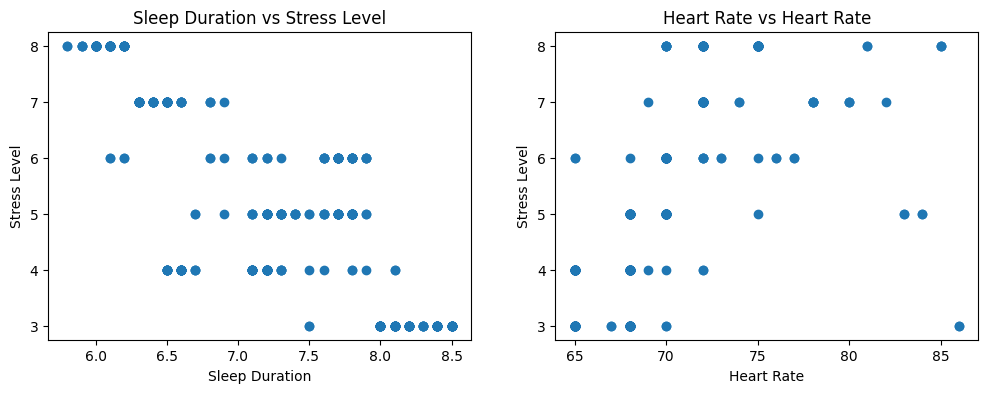

In [38]:
# Visualizing the relationship between stress levels and both sleep duration and heart rate

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot for quality of sleep vs stress level
ax1.scatter(raw_data['Sleep Duration'], raw_data['Stress Level'])
ax1.set_title('Sleep Duration vs Stress Level')
ax1.set_xlabel('Sleep Duration')
ax1.set_ylabel('Stress Level')

# Scatter plot for quality of sleep vs sleep duration
ax2.scatter(raw_data['Heart Rate'], raw_data['Stress Level'])
ax2.set_title('Heart Rate vs Heart Rate')
ax2.set_xlabel('Heart Rate')
ax2.set_ylabel('Stress Level')

plt.show()

In [ ]:
Stress level tends to decrease as sleep duration increases and rises as heart rate increases.

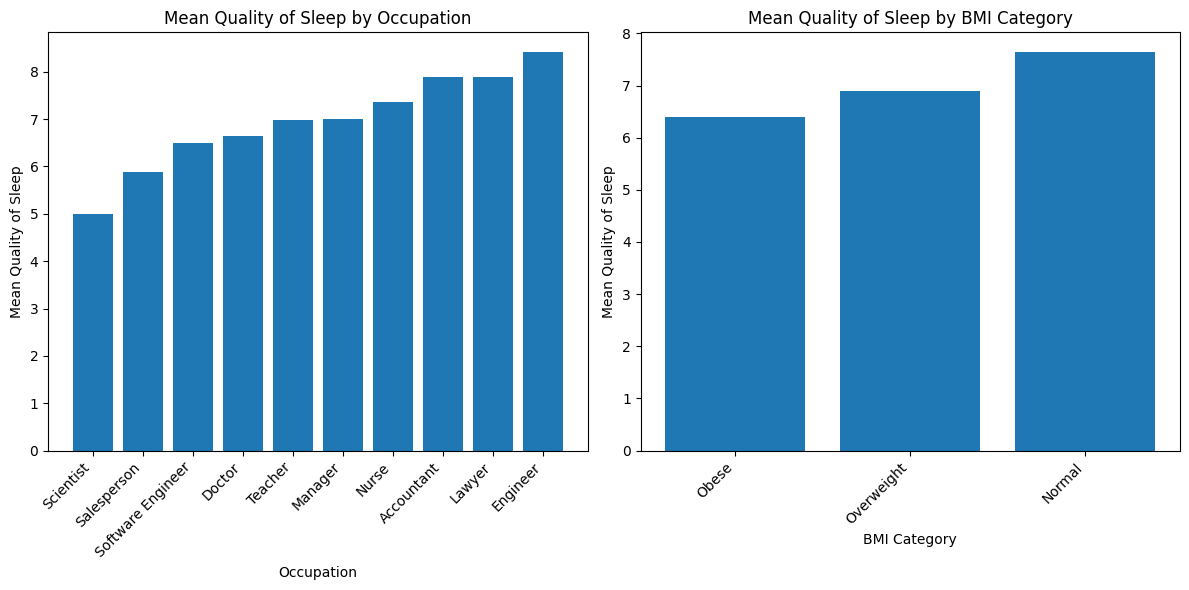

In [40]:
# Visualizing some of the categorical variables and their relation to quality of sleep

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
occupation_quality = raw_data.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
bmi_quality = raw_data.groupby('BMI Category')['Quality of Sleep'].mean().sort_values()

# Bar plot for occupation vs quality of sleep
ax1.bar(occupation_quality.index, occupation_quality.values)
ax1.set_title('Mean Quality of Sleep by Occupation')
ax1.set_xlabel('Occupation')
ax1.set_ylabel('Mean Quality of Sleep')
ax1.set_xticks(range(len(occupation_quality.index)))
ax1.set_xticklabels(occupation_quality.index, rotation=45, ha='right')

# Bar plot for BMI vs quality of sleep
ax2.bar(bmi_quality.index, bmi_quality.values)
ax2.set_title('Mean Quality of Sleep by BMI Category')
ax2.set_xlabel('BMI Category')
ax2.set_ylabel('Mean Quality of Sleep')
ax2.set_xticks(range(len(bmi_quality.index)))
ax2.set_xticklabels(bmi_quality.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
These insights suggest that both occupational factors and BMI can influence sleep quality, and targeted interventions considering these factors might be beneficial for improving overall sleep health.

In [ ]:
## Create Models

In [42]:
# Import the necessary library
from sklearn.linear_model import LinearRegression

# Define the response variable and predictor variables
X = data_num[['Sleep Duration', 'Stress Level', 'Heart Rate']]
y = data_num['Quality of Sleep']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients of the model
print('Coefficients:', model.coef_)


Coefficients: [ 0.69333281 -0.29661064 -0.03681626]


In [43]:
# Import the necessary library
from sklearn.linear_model import LinearRegression

# Define the response variable and predictor variables
X = data_num[['Stress Level', 'Heart Rate']]
y = data_num['Sleep Duration']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients of the model
print('Coefficients:', model.coef_)


Coefficients: [-0.37833747  0.00940953]


In [ ]:
##Conclusion

In [ ]:

The linear regression models provide insights into how correlated features impact sleep quality. Here are the key conclusions:

Attributes Most Correlated with Sleep Quality:

Sleep Duration:
For each extra hour of sleep (up to 8.5 hours), quality of sleep improves by about 7%.
Stress Level:
For each 1 point increase in stress level (on a scale of 1-10), quality of sleep decreases by about 3%.
Heart Rate:
For each 1 point increase in average heart rate, quality of sleep decreases by about 0.4%.
Factors Impacting Sleep Duration:

Stress Level:
For each 1 point increase in stress level, sleep duration decreases by about 0.4 hours (24 minutes).
Heart Rate:
For each 1 point increase in average heart rate, sleep duration increases by approximately 0.009 hours (0.5 minutes).
Occupation and Sleep Quality:

Lowest Quality of Sleep: Scientists and salespersons had the lowest quality of sleep ratings.
Highest Quality of Sleep: Engineers had the highest quality of sleep ratings.
These findings highlight the importance of sleep duration for improving sleep quality and emphasize the negative impact of stress on both sleep quality and duration.

In [ ]:
##Recommendations

In [ ]:
If you're struggling with low-quality sleep, consider the following:

Scientists had an average sleep quality rating of 5 out of 10, compared to engineers who rated their sleep quality at 8.4 out of 10, suggesting that occupation may impact sleep quality.

Prioritize increasing your sleep duration, as it is the most important factor for improving sleep quality; you can achieve this by reducing stress. 

Additionally, though less impactful, finding ways to decrease your average resting heart rate can also contribute to better sleep quality and duration.